In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
#Load Dataset
df=pd.read_csv("Mall_Customers.csv")
print("Data Loaded Successfully")
df.head(5)

Data Loaded Successfully


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print("Information about dataset")
df.info()

Information about dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
print("Description of Dataset")
df.describe()

Description of Dataset


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
Corr=df.corr(numeric_only=True)
print("Correlation of data is:",Corr)

Correlation of data is:                         CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


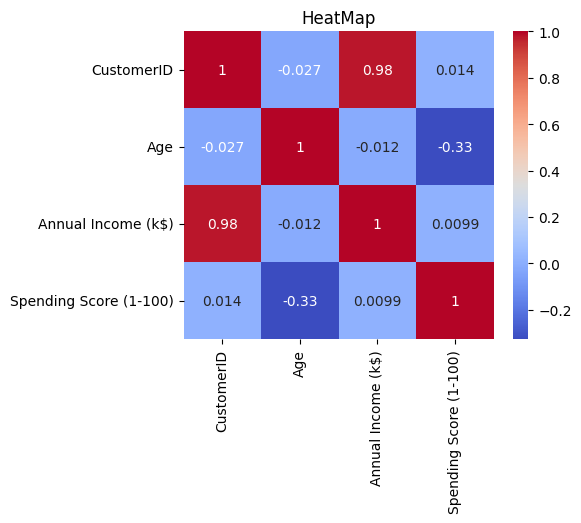

In [10]:
plt.figure(figsize=(5,4))
sns.heatmap(Corr,annot=True,cmap='coolwarm')
plt.title("HeatMap")
plt.show()

In [11]:
#Feature Selection
X=df[['Annual Income (k$)','Spending Score (1-100)']]
#Scale Features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

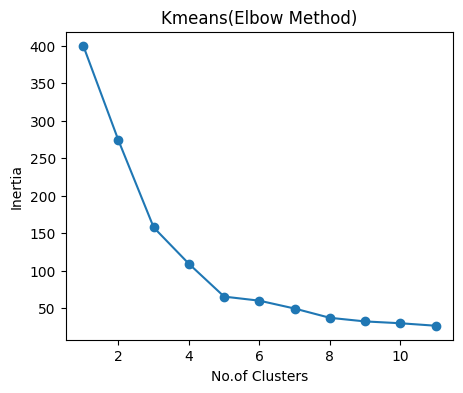

In [17]:
#Applying Kmean Algorithm
WCSS=[]
Range=range(1,12)
for k in Range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    WCSS.append(kmeans.inertia_)
#Plotting
plt.figure(figsize=(5,4))
plt.title("Kmeans(Elbow Method)")
plt.plot(Range,WCSS,marker='o')
plt.xlabel("No.of Clusters")
plt.ylabel("Inertia")
plt.show()

In [21]:
#Prediction for Optimal no (6) of cluster 
kmeans=KMeans(n_clusters=6,random_state=42)
df["Optimal Cluster"]=kmeans.fit_predict(X_scaled)
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Optimal Cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5


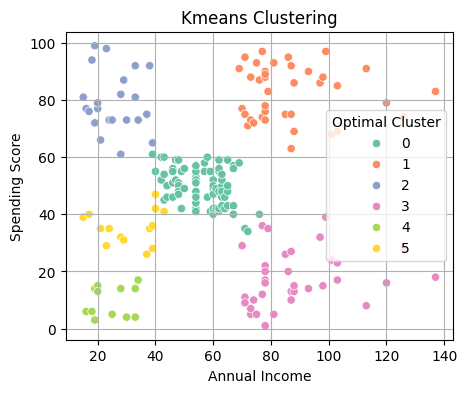

In [28]:
#Clusters Visualization
plt.figure(figsize=(5,4))
plt.title("Kmeans Clustering(Customer Segments)")
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Optimal Cluster',data=df,palette='Set2')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(True)
plt.show()


In [31]:
#Apllying DBSCAN
dbscan=DBSCAN(eps=0.5,min_samples=7)
df['DBSCAN Cluster']=dbscan.fit_predict(X_scaled)
df.head(5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Optimal Cluster,DBSCAN Cluster
0,1,Male,19,15,39,5,0
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,5,0


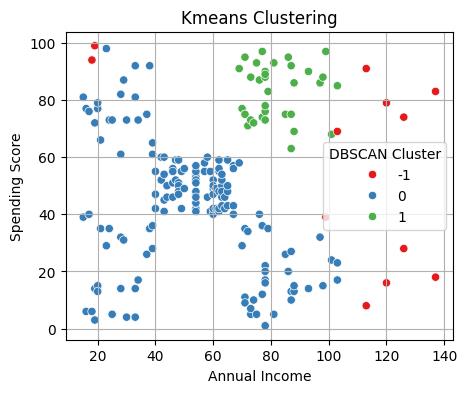

In [32]:
#Visualize DBSCAN Cluster
plt.figure(figsize=(5,4))
plt.title("DBSCAN Clustering(Customer Segments")
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='DBSCAN Cluster',data=df,palette='Set1')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(True)
plt.show()


In [38]:
#Average Spending Per Cluster
average=df.groupby('Optimal Cluster')[['Annual Income (k$)','Spending Score (1-100)']].mean()
print(average)

                 Annual Income (k$)  Spending Score (1-100)
Optimal Cluster                                            
0                         56.051948               49.857143
1                         86.538462               82.128205
2                         25.727273               79.363636
3                         88.200000               17.114286
4                         24.583333                9.583333
5                         31.533333               35.866667


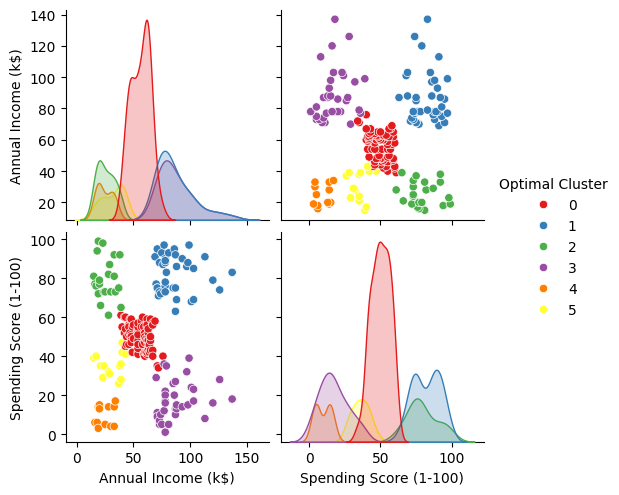

In [41]:
#Pair plot
sns.pairplot(df[['Annual Income (k$)','Spending Score (1-100)','Optimal Cluster']],hue='Optimal Cluster',palette='Set1')
plt.show()